<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/Padam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Padam: Partially adaptive momentum estimation method 

In [23]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np

In [24]:
def func(x1, x2):
  return 0.1*x1**2 + 2*x2**2

In [25]:
def grad_func_x1(x1):
  return 0.2*x1

In [26]:
def grad_func_x2(x2):
  return 4*x2

In [105]:
def Padam(lr = 0.05, p=1/4):
  x1, x2 = -10, -10  #parametrs
  log = []  #list to store the value of x1 and x2 i.e learning process

  beta1, beta2 = 0.9, 0.99
  eps = 1e-8

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, vt_x1, mt_x2, vt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_vt_x1, prev_vt_x2 =0,0,0,0

  vt_x1, vt_x2, prev_vt_x1, prev_vt_x2 = 0,0,0,0  # moving average over the second order moment of the stochastic gradients.

  vt_x1_hat, vt_x2_hat, prev_vt_x1_hat, prev_vt_x2_hat = 0,0,0,0

  t = 0

  while(1):    #Until Convergence
    t +=1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    mt_x1 = beta1*prev_mt_x1 + (1-beta1)*grad_x1
    vt_x1 = beta2*prev_vt_x1 + (1-beta2)*(grad_x1)**2  #moving average over the second order moment of the stochastic gradients.

    vt_x1_hat = max(prev_vt_x1_hat, vt_x1)

    mt_x2 = beta1*prev_mt_x2 + (1-beta1)*grad_x2
    vt_x2 = beta2*prev_vt_x2 + (1-beta2)*(grad_x2)**2  #moving average over the second order moment of the stochastic gradients.

    vt_x2_hat = max(prev_vt_x2_hat, vt_x2)

   
    
    prev_grad_x1 = grad_x1
    prev_vt_x1 = vt_x1
    prev_mt_x1 = mt_x1


    prev_grad_x2 = grad_x2
    prev_vt_x2 = vt_x2
    prev_mt_x2 = mt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - (lr*mt_x1)/(vt_x1_hat + eps)**p
    x2 = x2 - (lr*mt_x2)/(vt_x2_hat + eps)**p

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log, t

In [134]:
%%timeit
x1, x2, log_1, t = Padam(lr=0.01, p=1/4)


10 loops, best of 5: 27.8 ms per loop


In [118]:
t

15672

In [35]:
x1 = np.linspace(-10.0, 10.0, 100)
x2 = np.linspace(-10.0, 10.0, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = costs1 = np.array([func(X1, X2) for X1, X2 in zip(X1, X2)])

In [61]:
def Adam(lr = 0.05):
  x1, x2 = -10, -10  #parametrs
  log = []  #list to store the value of x1 and x2 i.e learning process

  beta1, beta2 = 0.9, 0.999
  eps = 1e-8

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, vt_x1, mt_x2, vt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_vt_x1, prev_vt_x2 =0,0,0,0

  vt_x1, vt_x2, prev_vt_x1, prev_vt_x2 = 0,0,0,0  # moving average over the second order moment of the stochastic gradients.

  vt_x1_hat, vt_x2_hat, prev_vt_x1_hat, prev_vt_x2_hat = 0,0,0,0
  mt_x1_hat, mt_x2_hat, prev_mt_x1_hat, prev_mt_x2_hat = 0,0,0,0


  t = 0

  while(1):    #Until Convergence
    t +=1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    mt_x1 = beta1*prev_mt_x1 + (1-beta1)*grad_x1
    vt_x1 = beta2*prev_vt_x1 + (1-beta2)*(grad_x1**2)  #moving average over the second order moment of the stochastic gradients.

    mt_x1_hat = mt_x1/1 - beta1**t
    vt_x1_hat - vt_x1/1 - beta2**t

    mt_x2 = beta1*prev_mt_x2 + (1-beta1)*grad_x2
    vt_x2 = beta2*prev_vt_x2 + (1-beta2)*(grad_x2**2) #moving average over the second order moment of the stochastic gradients.

    mt_x2_hat = mt_x2/1 - beta1**t
    vt_x2_hat = vt_x2/1 - beta2**t
   
    prev_grad_x1 = grad_x1
    prev_vt_x1 = vt_x1
    prev_mt_x1 = mt_x1


    prev_grad_x2 = grad_x2
    prev_vt_x2 = vt_x2
    prev_mt_x2 = mt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - (lr*mt_x1)/math.sqrt(vt_x1_hat + eps)
    x2 = x2 - (lr*mt_x2)/math.sqrt(vt_x2_hat + eps)

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2,log, t

In [120]:
%%timeit
x1, x2, log1, t1 = Adam(lr=0.001)

10 loops, best of 5: 69.7 ms per loop


In [121]:
t1

17275

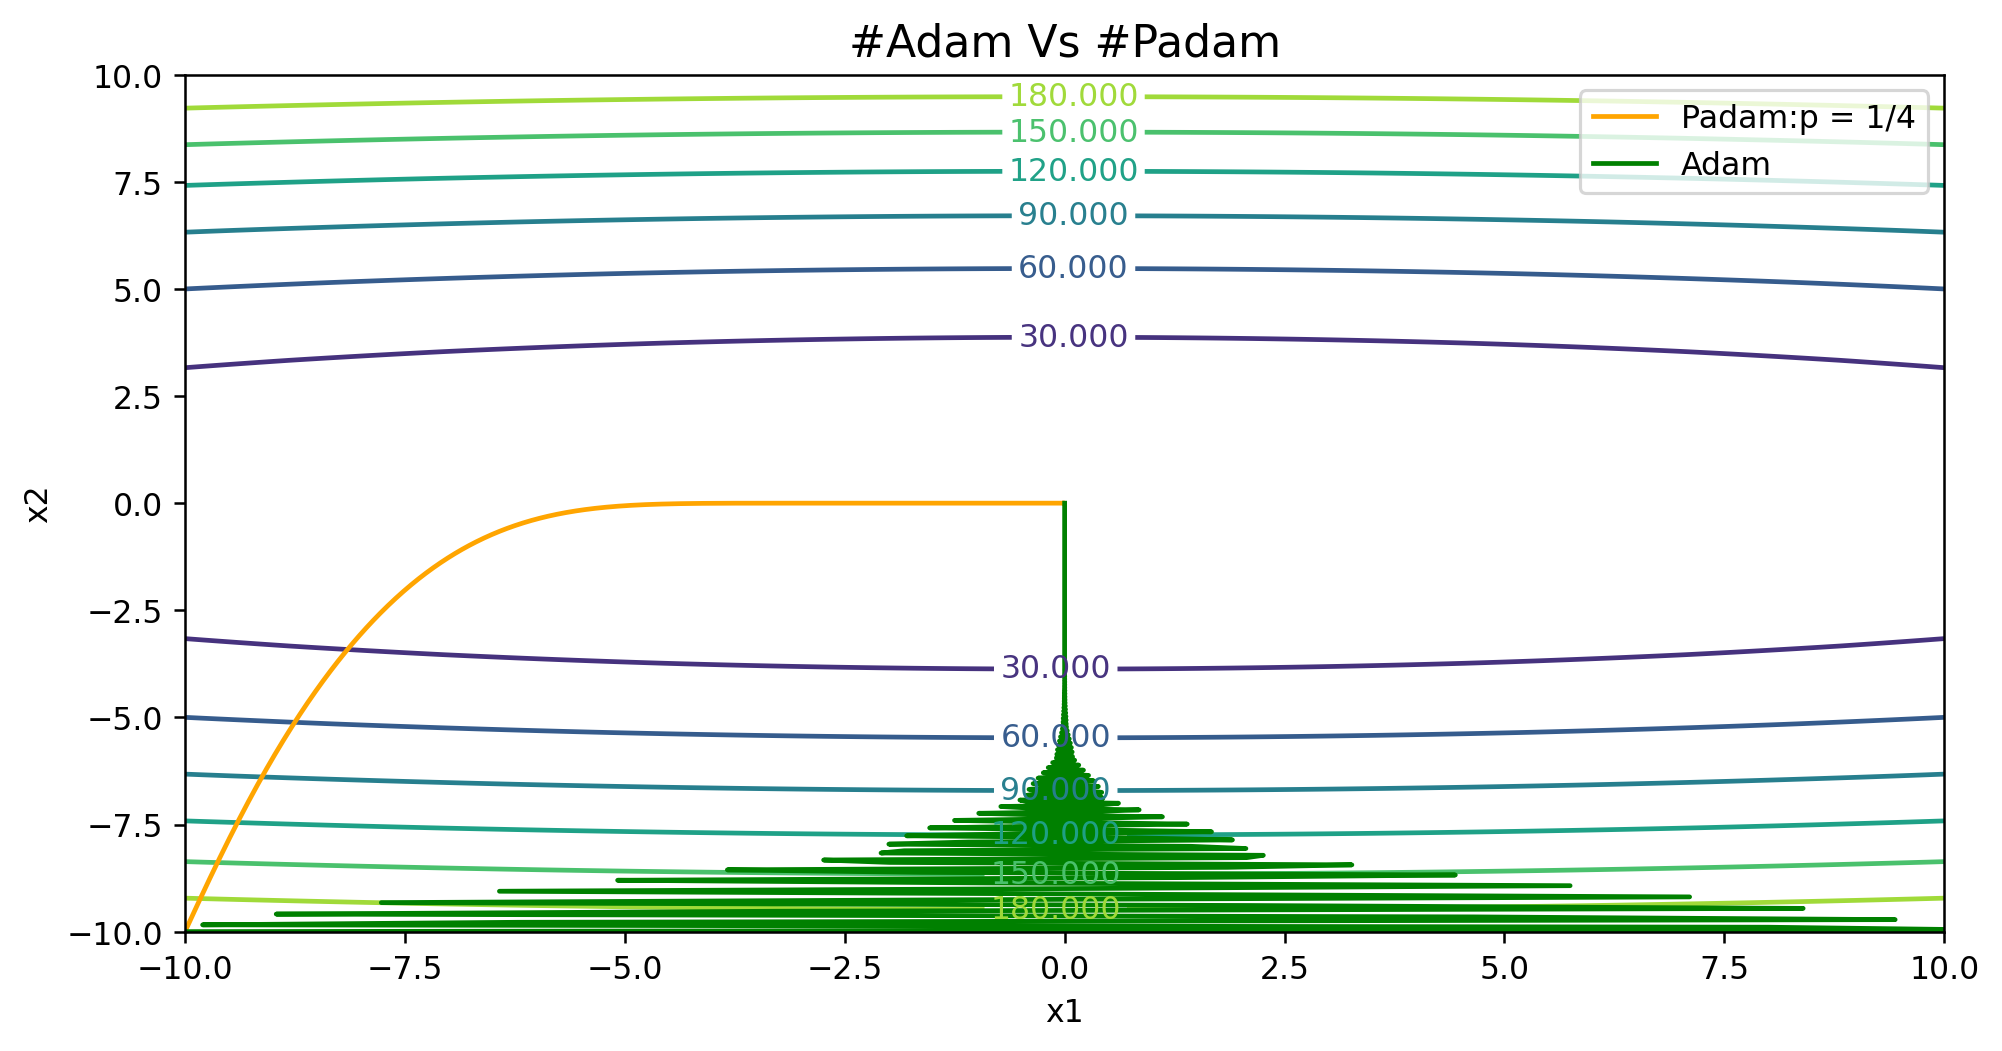

In [122]:
x_val_1 = [l[0] for l in log_1]
y_val_1 = [l[1] for l in log_1]

x_val1 = [l[0] for l in log1]
y_val1 = [l[1] for l in log1]



plt.figure(figsize=(10,5))


cp = plt.contour(X1, X2, Y)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')


'''
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
'''

plt.rcParams['figure.dpi'] = 227

plt.title('#Adam Vs #Padam', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_1, y_val_1, label= 'Padam:p = 1/4', color='orange')
plt.plot(x_val1, y_val1, label= 'Adam' ,color='green')

plt.legend()

plt.show()

In [135]:
%%timeit
x1, x2, log_2, t = Padam(lr=0.01, p=1/6)


10 loops, best of 5: 28.6 ms per loop


In [136]:
t

16545

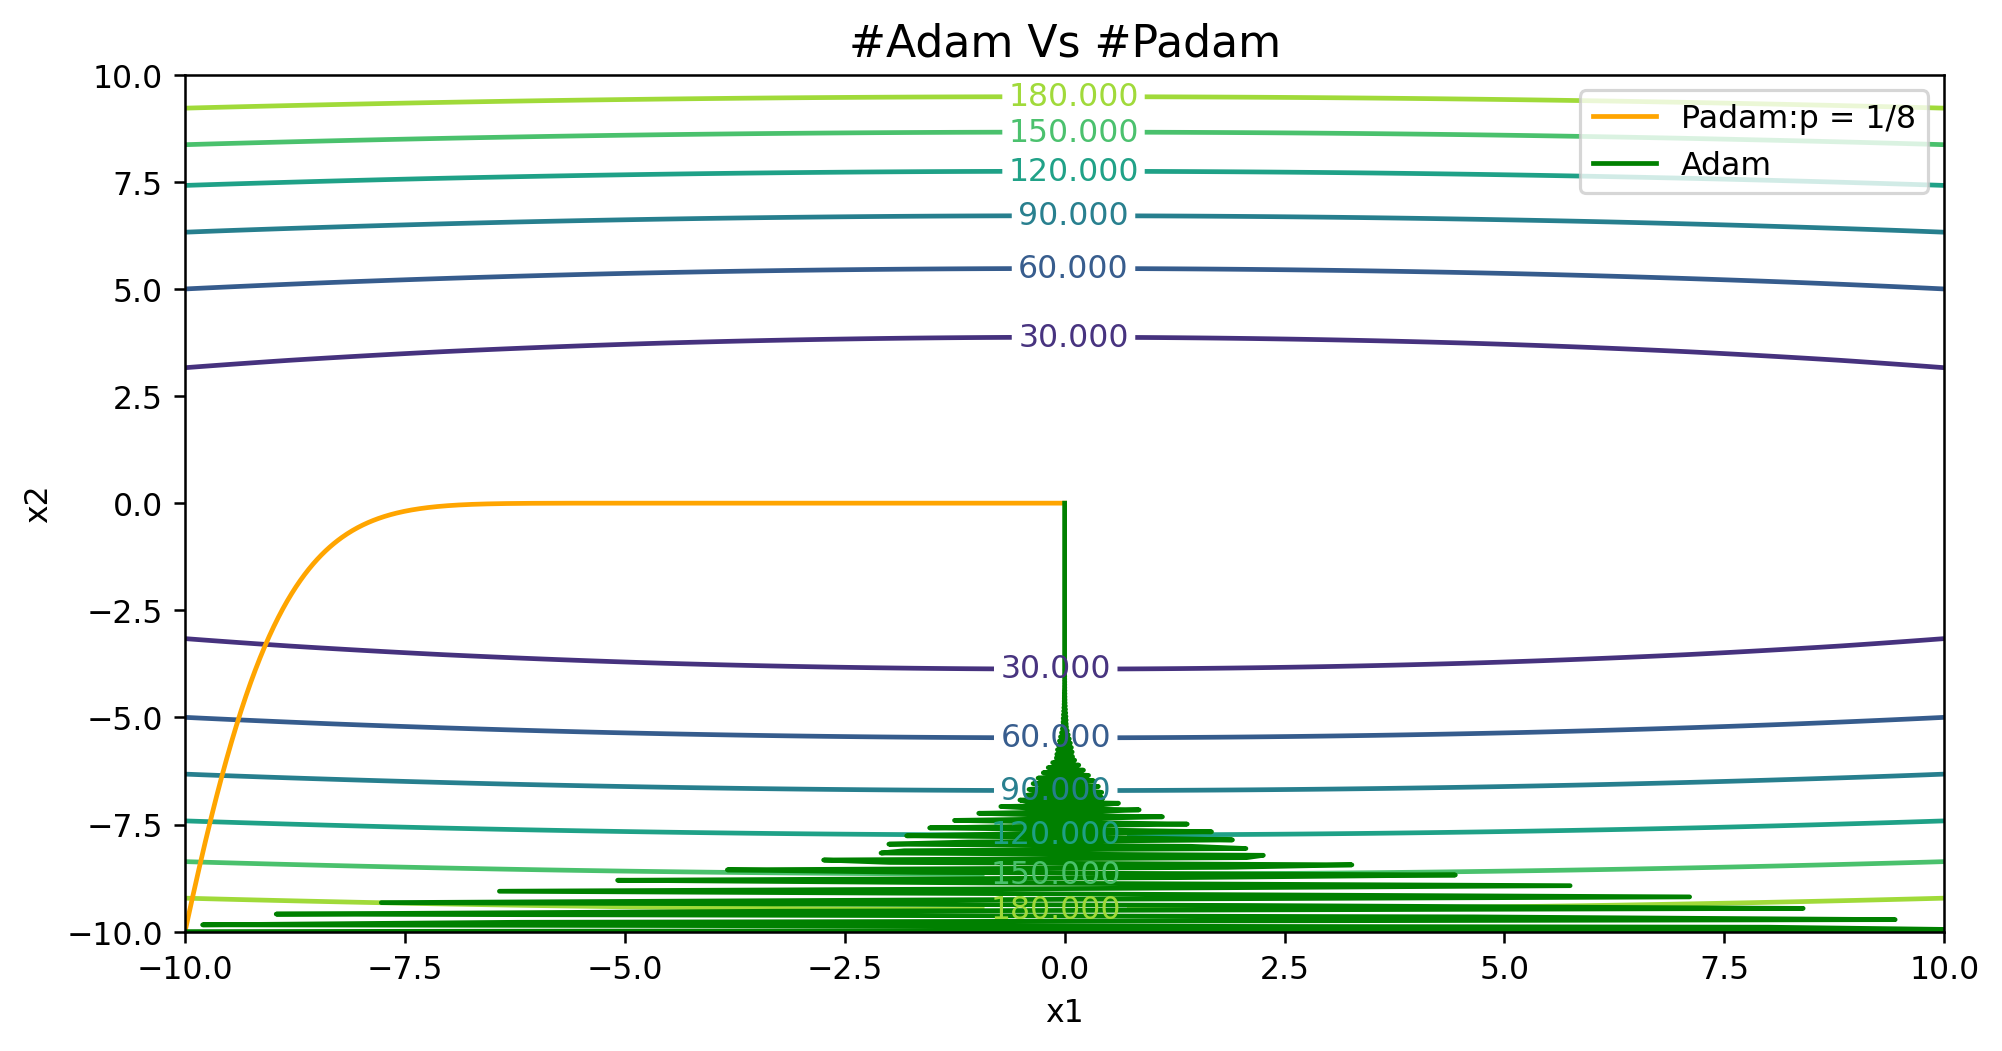

In [81]:
x_val_1 = [l[0] for l in log_1]
y_val_1 = [l[1] for l in log_1]

x_val1 = [l[0] for l in log1]
y_val1 = [l[1] for l in log1]



plt.figure(figsize=(10,5))


cp = plt.contour(X1, X2, Y)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')


'''
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
'''

plt.rcParams['figure.dpi'] = 227

plt.title('#Adam Vs #Padam', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_1, y_val_1, label= 'Padam:p = 1/8', color='orange')
plt.plot(x_val1, y_val1, label= 'Adam' ,color='green')

plt.legend()

plt.show()

In [148]:
%%time
x1, x2, log_3, t3 = Padam(lr=0.01, p=1/8)


CPU times: user 60.8 ms, sys: 0 ns, total: 60.8 ms
Wall time: 65 ms


In [149]:
t3

29897

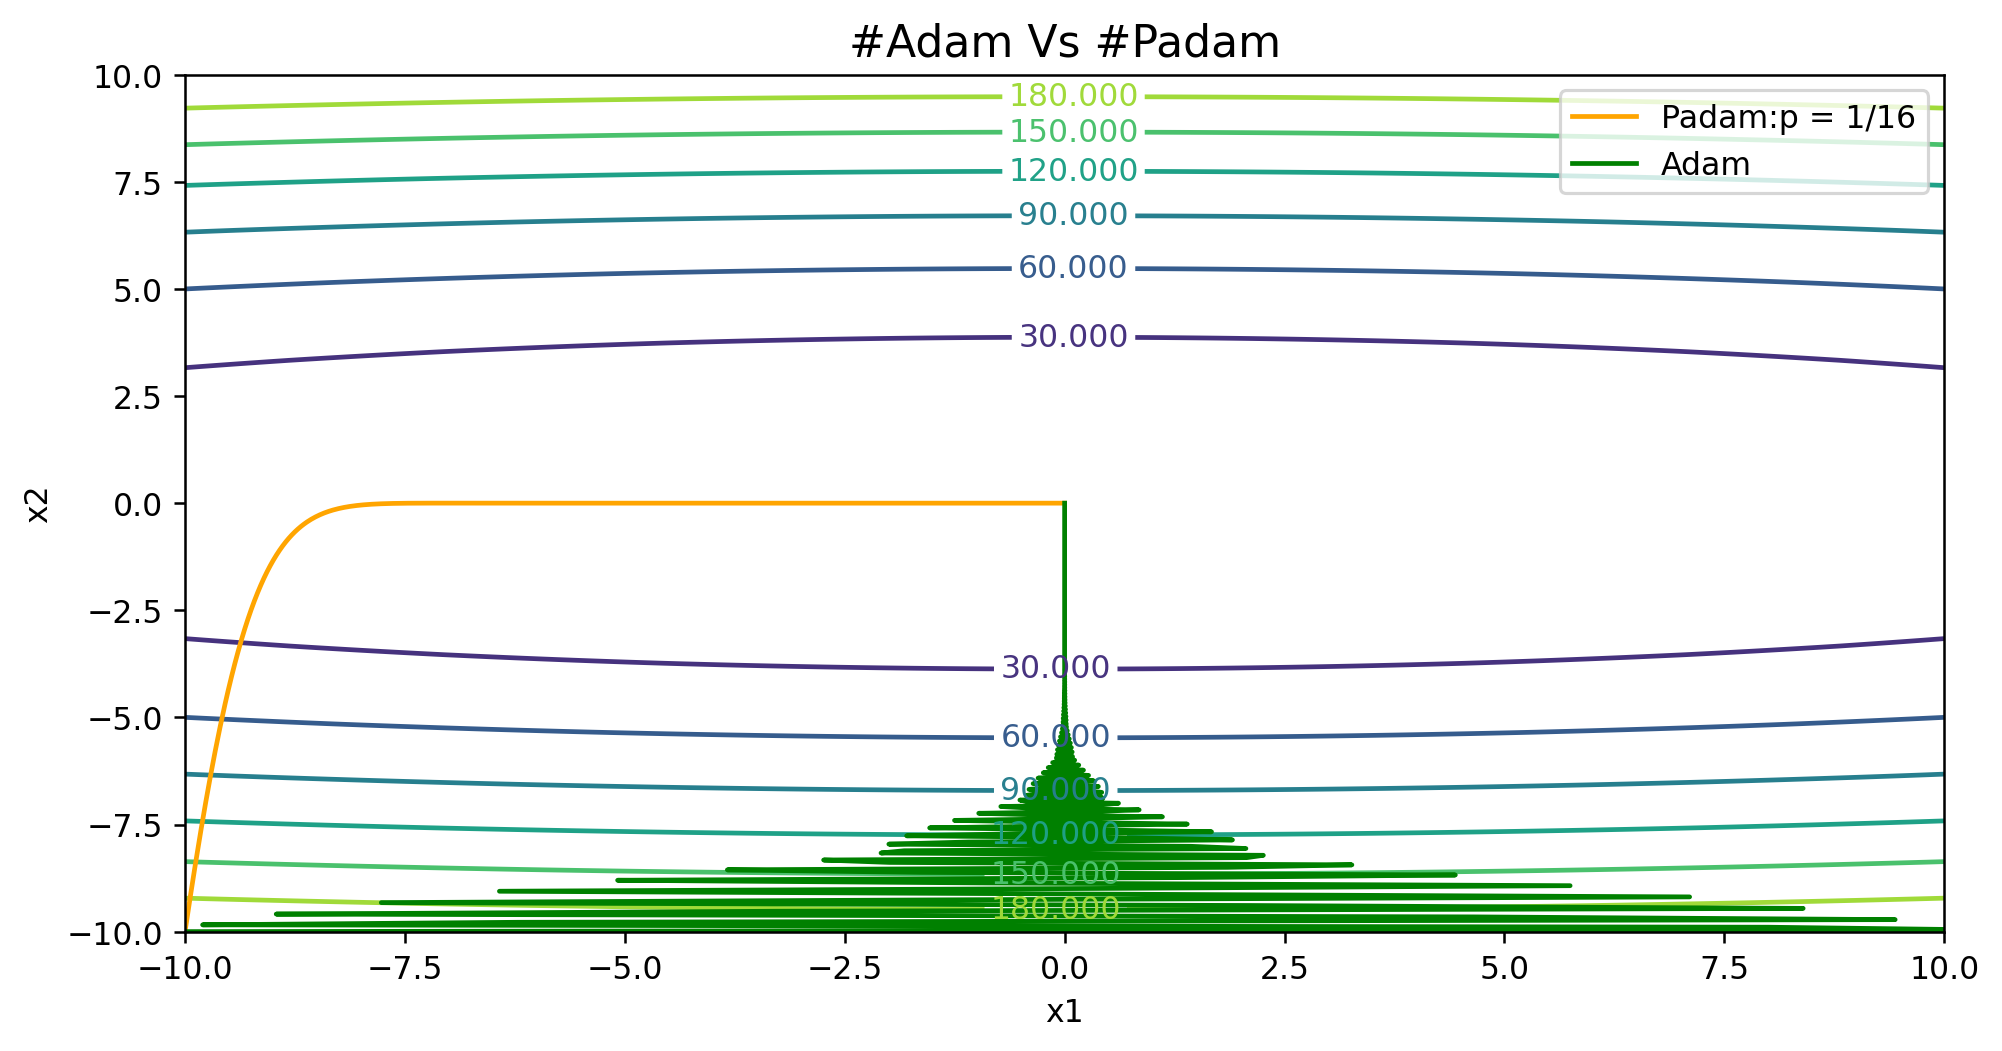

In [97]:
x_val_1 = [l[0] for l in log_1]
y_val_1 = [l[1] for l in log_1]

x_val1 = [l[0] for l in log1]
y_val1 = [l[1] for l in log1]



plt.figure(figsize=(10,5))


cp = plt.contour(X1, X2, Y)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')


'''
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
'''

plt.rcParams['figure.dpi'] = 227

plt.title('#Adam Vs #Padam', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_1, y_val_1, label= 'Padam:p = 1/16', color='orange')
plt.plot(x_val1, y_val1, label= 'Adam' ,color='green')

plt.legend()

plt.show()

In [152]:
%%time
x1, x2, log_4, tt = Padam(lr=0.01, p=1/10)


CPU times: user 110 ms, sys: 1.91 ms, total: 112 ms
Wall time: 117 ms


In [153]:
tt

52661

In [154]:
%%time
x1, x2, log_5, ty = Padam(lr=0.01, p=1/16)


CPU times: user 234 ms, sys: 15.1 ms, total: 249 ms
Wall time: 250 ms


In [155]:
ty

111426

In [130]:
%%time
x1, x2, log_6, t = Padam(lr=0.01, p=1/20)


CPU times: user 296 ms, sys: 25.7 ms, total: 322 ms
Wall time: 331 ms


In [91]:
t

16213

In [131]:
%%time
x1, x2, log_7, t = Padam(lr=0.01, p=1/7)


CPU times: user 34.5 ms, sys: 962 µs, total: 35.5 ms
Wall time: 37.8 ms


In [94]:
t

16545

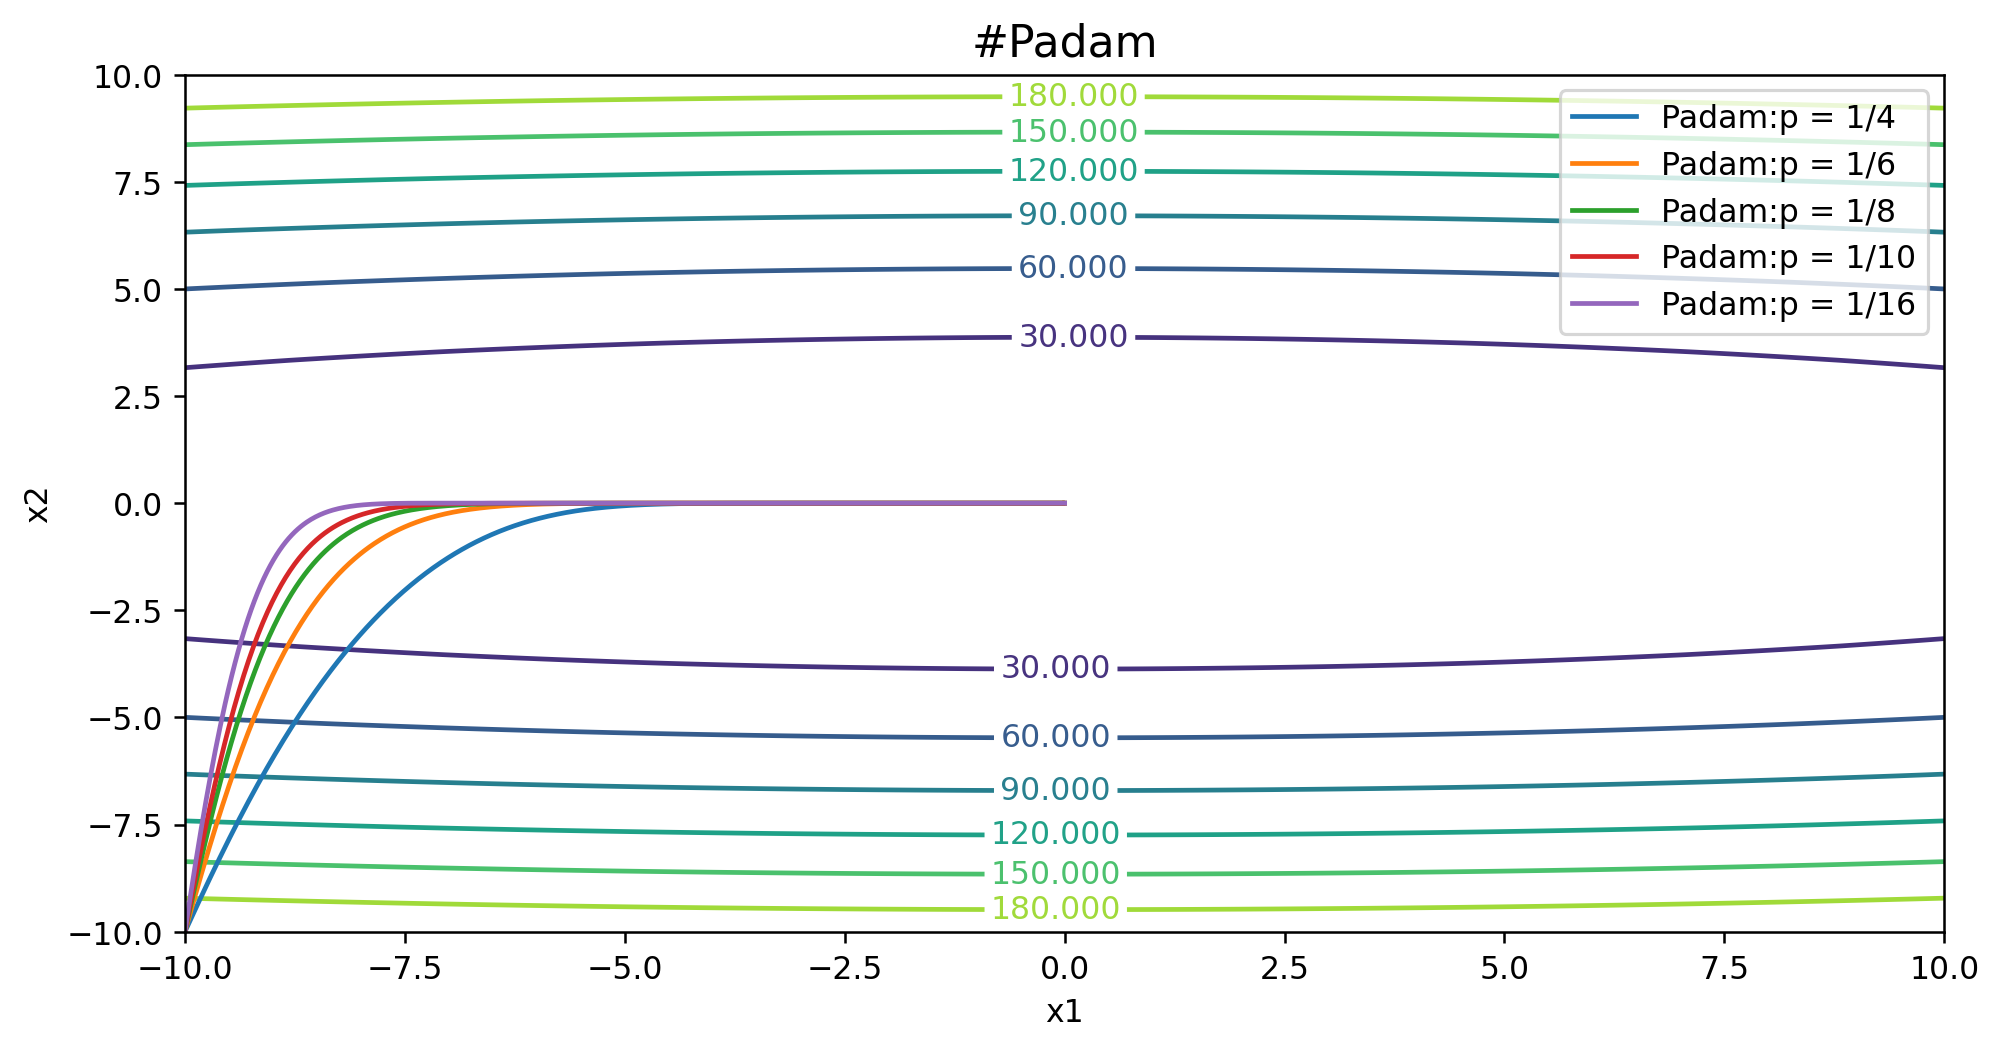

In [156]:
x_val_1 = [l[0] for l in log_1]
y_val_1 = [l[1] for l in log_1]

x_val_2 = [l[0] for l in log_2]
y_val_2 = [l[1] for l in log_2]

x_val_3 = [l[0] for l in log_3]
y_val_3 = [l[1] for l in log_3]

x_val_4 = [l[0] for l in log_4]
y_val_4 = [l[1] for l in log_4]

x_val_5 = [l[0] for l in log_5]
y_val_5 = [l[1] for l in log_5]


plt.figure(figsize=(10,5))


cp = plt.contour(X1, X2, Y)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')


'''
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
'''

plt.rcParams['figure.dpi'] = 227

plt.title('#Padam', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_1, y_val_1, label= 'Padam:p = 1/4')
plt.plot(x_val_2, y_val_2, label= 'Padam:p = 1/6')
plt.plot(x_val_3, y_val_3, label= 'Padam:p = 1/8')
plt.plot(x_val_4, y_val_4, label= 'Padam:p = 1/10')
plt.plot(x_val_5, y_val_5, label= 'Padam:p = 1/16')
plt.legend()

plt.show()